# Predspracovanie dat
Najskor si vyskusame spojenie datasetov a nahradenie dat, a na koniec nasleduje spojenie tychto transformaciach do pipeliny.

----

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats.api as sms

In [2]:
pd.options.display.width = None
pd.options.display.max_columns = None

In [3]:
data_personal = pd.read_csv("data/personal_train.csv")
data_other = pd.read_csv("data/other_train.csv")

In [4]:
data_personal.head()

,Unnamed: 0,name,address,age,sex,date_of_birth
0,0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02
1,1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00
2,2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09
3,3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00
4,4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15


In [5]:
data_other.head()

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
0,0,Latonya Wilhelm,"397 Joshua Forge Suite 012\nEast Ericburgh, WV...",f,11th,f,NaN,NaN,0.0,0.0,f,f,NaN,NaN,28729.0,40.0,Not-in-family,f,Private,f,negative.|1821,Separated,f,United-States,f,F,"{'TSH measured':'f','query hyperthyroid':'f','...",f,other,7.0,Machine-op-inspct,f,?,White,f
1,1,Stacy Martinson,"59472 Brian Views Apt. 885\nKeithhaven, KS 03608",t,11th,f,124.0,1.04,0.0,0.0,t,f,0.035,NaN,250121.0,40.0,Wife,f,Private,f,negative.|3498,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,7.0,Other-service,f,?,White,f
2,2,Linda Derby,Unit 5333 Box 7103\nDPO AA 03763,t,HS-grad,f,60.0,1.04,0.0,0.0,f,f,11.000,0.8,296125.0,30.0,Unmarried,f,Private,f,negative.|3768,Separated,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Priv-house-serv,f,?,Black,f
3,3,Albert Cipriano,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",t,Bachelors,f,101.0,0.81,0.0,0.0,f,f,0.250,2.0,187830.0,50.0,Not-in-family,f,Private,f,negative.|2403,Never-married,f,United-States,f,FALSE,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,13.0,Exec-managerial,f,?,White,f
4,4,David Cook,"7984 Jason Motorway Suite 440\nNelsonville, OK...",t,Some-college,f,89.0,0.83,0.0,0.0,f,f,1.800,2.3,312017.0,40.0,Not-in-family,f,Private,f,negative.|1588,Never-married,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,10.0,Exec-managerial,f,?,White,f


In [6]:
data_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 6 columns):
Unnamed: 0       2237 non-null int64
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2237 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 104.9+ KB


In [7]:
data_personal.describe(include='all')

,Unnamed: 0,name,address,age,sex,date_of_birth
count,2237.000000,2237,2237,2236.000000,2237,2236
unique,NaN,2236,2237,NaN,3,2196
top,NaN,Terry Murphy,"65198 Willie Skyway\nOscarview, NV 01293",NaN,F,1958-01-03
freq,NaN,2,1,NaN,1448,2
mean,1118.000000,NaN,NaN,51.822004,NaN,NaN
std,645.910598,NaN,NaN,20.884439,NaN,NaN
min,0.000000,NaN,NaN,1.000000,NaN,NaN
25%,559.000000,NaN,NaN,36.000000,NaN,NaN
50%,1118.000000,NaN,NaN,54.000000,NaN,NaN
75%,1677.000000,NaN,NaN,67.000000,NaN,NaN


In [8]:
data_other.describe(include='all')

,Unnamed: 0,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
count,2287.000000,2287,2287,2280,2279,2278,2126.000000,2039.000000,2281.000000,2279.000000,2272,2276,2038.000000,1804.000000,2277.000000,2276.000000,2278,2283,2109,2278,2280,2281,2282,2282,2276,2279,2280,2274,2278,2056.000000,2279,2276,2280,2280,2276
unique,NaN,2236,2237,3,24,3,NaN,NaN,NaN,NaN,2,3,NaN,NaN,NaN,NaN,6,3,9,3,2237,6,3,36,2,6,539,3,10,NaN,14,2,1,5,3
top,NaN,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,HS-grad,f,NaN,NaN,NaN,NaN,f,f,NaN,NaN,NaN,NaN,Not-in-family,f,Private,f,negative.|1571,Never-married,f,United-States,f,f,"{'TSH measured':'f','query hyperthyroid':'f','...",t,other,NaN,Adm-clerical,f,?,White,f
freq,NaN,3,3,2043,634,2266,NaN,NaN,NaN,NaN,2005,2221,NaN,NaN,NaN,NaN,734,2250,1465,2239,3,889,2259,2053,2275,2023,109,1797,1177,NaN,390,2275,2280,1891,2241
mean,1143.000000,NaN,NaN,NaN,NaN,NaN,109.462088,0.996436,194.064007,817.727512,NaN,NaN,4.691447,2.020926,187889.619675,38.293058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.050584,NaN,NaN,NaN,NaN,NaN
std,660.344355,NaN,NaN,NaN,NaN,NaN,35.879295,0.191213,9116.985776,5971.192914,NaN,NaN,22.630656,0.814135,103904.464111,12.341755,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.494250,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,2.000000,0.310000,-200100.000000,0.000000,NaN,NaN,0.005000,0.050000,19395.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
25%,571.500000,NaN,NaN,NaN,NaN,NaN,88.000000,0.880000,0.000000,0.000000,NaN,NaN,0.440000,1.600000,115631.000000,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN
50%,1143.000000,NaN,NaN,NaN,NaN,NaN,104.000000,0.980000,0.000000,0.000000,NaN,NaN,1.400000,2.000000,176262.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN
75%,1714.500000,NaN,NaN,NaN,NaN,NaN,126.000000,1.080000,0.000000,0.000000,NaN,NaN,2.600000,2.400000,237141.000000,40.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,NaN,NaN


Ako prve vyhodime zbytocny stlpec 'Unnamed: 0', ktory je vlastne pouzivany ako index stlpec.

In [9]:
data_personal = data_personal.drop(['Unnamed: 0'], axis=1)

In [10]:
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2287 entries, 0 to 2286
Data columns (total 35 columns):
Unnamed: 0            2287 non-null int64
name                  2287 non-null object
address               2287 non-null object
FTI measured          2280 non-null object
education             2279 non-null object
lithium               2278 non-null object
TT4                   2126 non-null float64
T4U                   2039 non-null float64
capital-loss          2281 non-null float64
capital-gain          2279 non-null float64
on thyroxine          2272 non-null object
tumor                 2276 non-null object
TSH                   2038 non-null float64
T3                    1804 non-null float64
fnlwgt                2277 non-null float64
hours-per-week        2276 non-null float64
relationship          2278 non-null object
thyroid surgery       2283 non-null object
workclass             2109 non-null object
I131 treatment        2278 non-null object
class                 2280

To iste urobime aj pre data_other dataset.

In [11]:
data_other = data_other.drop(['Unnamed: 0'], axis=1)

# Spojenie datasetov
Datasety budeme spajat podla stlpcov 'name' a 'address'

----

## Spojenie duplikatnych hodnot v dataset 'data_other'

In [12]:
data_other[data_other['name'] == 'Christian Ortega']

,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
208,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,Assoc_acdm,f,120.0,1.31,0.0,0.0,f,f,1.5,2.7,213214.0,40.0,Husband,f,Private,f,negative.|1571,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,12.0,Sales,f,?,White,f
1600,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,NaN,NaN,120.0,1.31,0.0,NaN,f,f,1.5,2.7,213214.0,40.0,Husband,f,Private,f,negative.|1571,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,12.0,NaN,NaN,?,White,f
1611,Christian Ortega,"1058 Matthew Forges\nChristopherland, KS 28828",t,Assoc_acdm,f,120.0,NaN,0.0,0.0,f,f,1.5,2.7,213214.0,40.0,Husband,NaN,Private,f,negative.|1571,Married-civ-spouse,f,United-States,f,NaN,NaN,NaN,NaN,12.0,Sales,f,?,White,f


Ako vidime, v tomto dataset sa nachadzaju duplikaty ktore budeme musiet mergenut do jedneho zaznamu.

In [13]:
data_personal[data_personal['name']=='Terry Murphy']

,name,address,age,sex,date_of_birth
654,Terry Murphy,"53302 Julie Lane\nNorth Stanleyburgh, KY 68353",77.0,F,1941-08-06
976,Terry Murphy,"3913 Jeffery Underpass\nSouth Johnland, CO 78601",54.0,?,1964-06-26


Tato hodnota zodpoveda duplicitnym zaznamom v datasete data_other podla mena a adresy

In [14]:
len(data_other[data_other.duplicated(subset=['name', 'address'])])

50

Prezrieme zaznami ktore maju rovnaku hodnotu pre name aj adress, aby sme vedeli ako ich mame mergeovat.

In [15]:
data_other[data_other.duplicated(subset=['name', 'address'], keep=False)].sort_values(by=['name'])

,name,address,FTI measured,education,lithium,TT4,T4U,capital-loss,capital-gain,on thyroxine,tumor,TSH,T3,fnlwgt,hours-per-week,relationship,thyroid surgery,workclass,I131 treatment,class,marital-status,goitre,native-country,hypopituitary,query on thyroxine,medical_info,T3 measured,referral source,education-num,occupation,TBG measured,TBG,race,pregnant
2164,Abraham Hicks,"93316 Amber Highway\nMarkland, AR 79881",t,Doctorate,f,111.0,1.15,NaN,0.0,NaN,NaN,1.30,2.40,87507.0,60.0,Husband,f,Private,f,NaN,Married-civ-spouse,f,India,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,16.0,Prof-specialty,f,?,Asian-Pac-Islander,f
244,Abraham Hicks,"93316 Amber Highway\nMarkland, AR 79881",t,Doctorate,f,NaN,1.15,0.0,0.0,NaN,f,1.30,2.40,87507.0,60.0,Husband,f,Private,f,negative.|3675,Married-civ-spouse,f,India,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,16.0,Prof-specialty,f,?,Asian-Pac-Islander,f
1517,Alvin Cannon,"487 Ward Cove Apt. 949\nSouth Elizabethville, ...",t,Bachelors,f,127.0,0.90,0.0,0.0,t,f,0.08,NaN,101709.0,40.0,Husband,t,Private,f,negative.|3276,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,13.0,Prof-specialty,f,?,Asian-Pac-Islander,f
1134,Alvin Cannon,"487 Ward Cove Apt. 949\nSouth Elizabethville, ...",NaN,Bachelors,NaN,NaN,0.90,0.0,0.0,t,f,NaN,NaN,101709.0,40.0,Husband,t,NaN,f,negative.|3276,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",f,other,13.0,Prof-specialty,f,?,Asian-Pac-Islander,f
1188,Ann Waller,"11040 Melissa Trafficway Suite 038\nKimbury, N...",NaN,Assoc-voc,f,100.0,0.88,0.0,0.0,f,f,3.40,NaN,NaN,40.0,Not-in-family,f,Private,f,negative.|2635,Never-married,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,11.0,NaN,f,?,White,f
1906,Ann Waller,"11040 Melissa Trafficway Suite 038\nKimbury, N...",t,Assoc-voc,f,100.0,NaN,0.0,NaN,f,f,3.40,1.60,306967.0,40.0,Not-in-family,f,Private,f,negative.|2635,Never-married,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVHC,11.0,Adm-clerical,f,?,White,f
1305,Annette Buzard,"355 Cynthia Lakes\nWest Reginald, MO 65366",NaN,HS-grad,f,21.0,1.10,0.0,0.0,f,f,468.00,0.70,338270.0,40.0,Unmarried,f,NaN,f,negative.|3047,Separated,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,9.0,Adm-clerical,f,?,White,f
696,Annette Buzard,"355 Cynthia Lakes\nWest Reginald, MO 65366",t,HS-grad,f,21.0,1.10,0.0,0.0,f,f,468.00,0.70,338270.0,40.0,Unmarried,NaN,Private,f,negative.|3047,Separated,f,United-States,NaN,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,other,9.0,Adm-clerical,f,?,White,f
1986,Carlos Schwartz,"639 Suzanne Port\nErinmouth, CA 39976",t,HS_grad,f,NaN,0.85,0.0,0.0,f,f,5.00,0.70,95336.0,45.0,Husband,f,Private,f,negative.|2679,Married-civ-spouse,f,United-States,NaN,f,"{'TSH measured':'t','query hyperthyroid':'f','...",NaN,SVI,9.0,Tech-support,f,?,White,f
470,Carlos Schwartz,"639 Suzanne Port\nErinmouth, CA 39976",t,HS_grad,f,54.0,0.85,NaN,0.0,f,NaN,5.00,0.70,95336.0,45.0,Husband,f,Private,NaN,negative.|2679,Married-civ-spouse,f,United-States,f,f,"{'TSH measured':'t','query hyperthyroid':'f','...",t,SVI,9.0,Tech-support,f,?,White,f


Urobime novy dataset, ktory budeme mat groupnuty podla mena aj adresy, aby sme lahsie vedeli mergeovat polozky.

In [16]:
grouped = data_other[data_other.duplicated(subset=['name', 'address'], keep=False)].groupby(['name', 'address'])

Zadefinujeme funkciu pomocou ktorej budeme mergeovat duplikatne polozky.

In [17]:
from collections import Counter

def handle_duplicate_rows(rows):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    # Zoberieme si iba polozky numerickeho typu, nad ktorymi aplikujeme agregovanu funkciu: mean
    numeric_rows = rows.select_dtypes(include=numerics).agg(np.mean)
    
    # To iste urobime pre polozky ineho datoveho typu ako numericke, na ktore aplikujeme agregovanu funkciu najcastejsie
    # vyskytujucu hodnotu
    cat_rows = rows.select_dtypes(include=['object']).agg(most_common)
    
    # Skobinujeme tieto dva datasety
    combined = pd.concat([numeric_rows, cat_rows], axis=0)
    #print(pd.DataFrame(combined))
    return combined
    
# Funkcia ktora vrati najcastejsiu hodnotu
def most_common(rows):
    counts = rows.value_counts()
    if len(counts) > 0:
        return counts.index[0]
    
    return float('nan')

Aplikujeme transformacnu funkciu na duplikatne polozky z datasetu

In [ ]:
result = grouped.apply(handle_duplicate_rows).reset_index(drop=True)

Vyhodime vsetky duplicity z data_other datasetu.

In [ ]:
dropped_duplicates = data_other.drop_duplicates(subset=['name', 'address'], keep=False)
print(len(dropped_duplicates))

2188


Pridame naspat duplicity, ale uz iba jeden zaznam z kazdeho, z polozkami spravne mergenutymi.

In [ ]:
data_other_ = pd.concat([dropped_duplicates, result])
data_other_.head()

/Users/edvin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,address,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,medical_info,name,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass
0,f,f,NaN,f,NaN,?,f,NaN,NaN,"397 Joshua Forge Suite 012\nEast Ericburgh, WV...",0.0,0.0,negative.|1821,11th,7.0,28729.0,f,40.0,f,f,Separated,"{'TSH measured':'f','query hyperthyroid':'f','...",Latonya Wilhelm,United-States,Machine-op-inspct,f,f,F,White,other,Not-in-family,f,f,Private
1,t,f,NaN,f,1.04,?,f,0.035,124.0,"59472 Brian Views Apt. 885\nKeithhaven, KS 03608",0.0,0.0,negative.|3498,11th,7.0,250121.0,f,40.0,f,f,Married-civ-spouse,"{'TSH measured':'t','query hyperthyroid':'f','...",Stacy Martinson,United-States,Other-service,t,f,f,White,other,Wife,f,f,Private
2,t,f,0.8,t,1.04,?,f,11.000,60.0,Unit 5333 Box 7103\nDPO AA 03763,0.0,0.0,negative.|3768,HS-grad,9.0,296125.0,f,30.0,f,f,Separated,"{'TSH measured':'t','query hyperthyroid':'f','...",Linda Derby,United-States,Priv-house-serv,f,f,f,Black,SVI,Unmarried,f,f,Private
3,t,f,2.0,t,0.81,?,f,0.250,101.0,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",0.0,0.0,negative.|2403,Bachelors,13.0,187830.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",Albert Cipriano,United-States,Exec-managerial,f,f,FALSE,White,SVI,Not-in-family,f,f,Private
4,t,f,2.3,t,0.83,?,f,1.800,89.0,"7984 Jason Motorway Suite 440\nNelsonville, OK...",0.0,0.0,negative.|1588,Some-college,10.0,312017.0,f,40.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",David Cook,United-States,Exec-managerial,f,f,f,White,other,Not-in-family,f,f,Private


In [ ]:
print(len(data_other_))

2237


Preverime dlzku data_other datasetu, tato musi byt rovnaka z dlzkou data_personal datasetu, preto lebo v nom ninto ziadne duplicity.

In [ ]:
print(len(data_other_) == len(data_personal))

True


-----

## Nasleduje aby sme spojili datasety 'data_other_' a 'data_personal'

In [ ]:
data_final = pd.merge(data_personal, data_other_, how='inner', left_on=['name', 'address'], right_on=['name', 'address'])
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,medical_info,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02,f,f,1.6,t,NaN,?,f,0.10,182.0,0.0,0.0,negative.|2815,HS-grad,9.0,144844.0,f,40.0,f,f,Married-civ-spouse,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Craft-repair,f,f,f,White,SVHC,Husband,f,f,Private
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00,t,f,1.3,t,0.94,?,f,2.00,136.0,0.0,0.0,negative.|3345,Bachelors,13.0,335067.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Sales,f,f,f,White,SVHD,Not-in-family,f,f,Private
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,f,f,NaN,f,NaN,?,f,NaN,NaN,0.0,0.0,negative.|262,Prof-school,15.0,186035.0,f,30.0,f,f,Married-civ-spouse,"{'TSH measured':'f','query hyperthyroid':'f','...",United-States,Sales,f,f,f,White,other,Husband,f,f,Self-emp-not-inc
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00,t,f,1.8,t,1.16,?,f,1.60,136.0,0.0,0.0,negative.|2228,Bachelors,13.0,36601.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Prof-specialty,f,f,f,White,SVI,Not-in-family,f,f,Private
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,t,f,1.8,t,0.85,?,f,0.67,107.0,0.0,0.0,negative.|3085,HS-grad,9.0,29810.0,f,50.0,f,f,Never-married,"{'TSH measured':'t','query hyperthyroid':'f','...",United-States,Other-service,f,f,f,White,other,Not-in-family,f,f,Private


Preverime ci nahodou neostali nejake duplicity vo finalnom datasete.

In [ ]:
data_final[data_final.duplicated(subset=['name', 'address'], keep=False)]

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,medical_info,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass


-----

## Pretoze v polozky 'medical_info' jestvuju dalsie atributy v podobe JSONu, potrebujeme ich spracovat a pridat do datasetu.

In [ ]:
data_final['medical_info'][0]

"{'TSH measured':'t','query hyperthyroid':'f','TT4 measured':'t','on antithyroid medication':'f','FTI':'?','sick':'f','T4U measured':'f','psych':'t','query hypothyroid':'f'}"

In [ ]:
import ast

# Najprv vytvorime novy dataset z atributov ktore su zaenkodovane ako json v polozky medical_info
new_columns = data_final.pop('medical_info').apply(lambda x: pd.Series(ast.literal_eval(x)))

# Potom ich pridame do data_final datasetu.
data_final = data_final.join(new_columns)

In [ ]:
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TBG,TBG measured,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,hypopituitary,lithium,marital-status,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02,f,f,1.6,t,NaN,?,f,0.10,182.0,0.0,0.0,negative.|2815,HS-grad,9.0,144844.0,f,40.0,f,f,Married-civ-spouse,United-States,Craft-repair,f,f,f,White,SVHC,Husband,f,f,Private,t,f,t,f,?,f,f,t,f
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00,t,f,1.3,t,0.94,?,f,2.00,136.0,0.0,0.0,negative.|3345,Bachelors,13.0,335067.0,f,50.0,f,f,Never-married,United-States,Sales,f,f,f,White,SVHD,Not-in-family,f,f,Private,t,f,t,f,145,t,t,f,f
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,f,f,NaN,f,NaN,?,f,NaN,NaN,0.0,0.0,negative.|262,Prof-school,15.0,186035.0,f,30.0,f,f,Married-civ-spouse,United-States,Sales,f,f,f,White,other,Husband,f,f,Self-emp-not-inc,f,f,f,f,?,f,f,f,f
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00,t,f,1.8,t,1.16,?,f,1.60,136.0,0.0,0.0,negative.|2228,Bachelors,13.0,36601.0,f,50.0,f,f,Never-married,United-States,Prof-specialty,f,f,f,White,SVI,Not-in-family,f,f,Private,t,f,t,f,117,t,t,f,t
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,t,f,1.8,t,0.85,?,f,0.67,107.0,0.0,0.0,negative.|3085,HS-grad,9.0,29810.0,f,50.0,f,f,Never-married,United-States,Other-service,f,f,f,White,other,Not-in-family,f,f,Private,t,f,t,f,126,f,t,f,f


Vidime ze uz v data_final datasete nemame atribut 'medical_info' a ze jeho polozky su ako nove atributy v datasete.

----

## Analyzu doplnenych atributov

In [ ]:
new_columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 9 columns):
TSH measured                 2237 non-null object
query hyperthyroid           2237 non-null object
TT4 measured                 2237 non-null object
on antithyroid medication    2237 non-null object
FTI                          2237 non-null object
sick                         2237 non-null object
T4U measured                 2237 non-null object
psych                        2237 non-null object
query hypothyroid            2237 non-null object
dtypes: object(9)
memory usage: 254.8+ KB


In [ ]:
new_columns.describe(include="all")

,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
count,2237,2237,2237,2237,2237,2237,2237,2237,2237
unique,2,3,3,3,199,3,3,3,3
top,t,f,t,f,?,f,t,f,f
freq,2005,2100,2088,2209,233,2149,2001,2127,2104


In [ ]:
for column in new_columns:
    print(column)
    print(data_final[column].value_counts())
    print("----")

TSH measured
t    2005
f     232
Name: TSH measured, dtype: int64
----
query hyperthyroid
f      2100
t       136
f.8       1
Name: query hyperthyroid, dtype: int64
----
TT4 measured
t      2088
f       148
t.2       1
Name: TT4 measured, dtype: int64
----
on antithyroid medication
f      2209
t        27
f.2       1
Name: on antithyroid medication, dtype: int64
----
FTI
?      233
93      46
104     43
114     43
98      42
100     40
112     40
101     40
96      38
97      36
92      36
113     35
107     34
106     34
109     33
95      33
105     33
108     32
102     32
94      29
103     29
121     29
110     29
91      29
88      28
90      28
116     28
115     28
117     27
83      26
      ... 
232      1
39       1
8.9      1
48       1
43       1
197      1
362      1
50       1
312      1
237      1
16       1
187      1
215      1
7.6      1
17       1
47       1
281      1
203      1
242      1
26       1
162      1
235      1
220      1
24       1
224      1
37       1

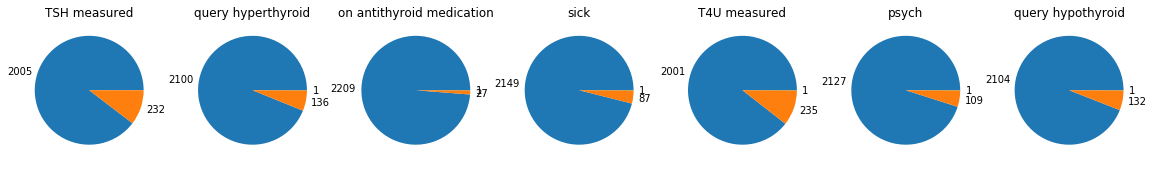

In [ ]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(1, 7, figsize=(20, 20))

ax1.pie(data_final['TSH measured'].value_counts(), labels=data_final['TSH measured'].value_counts())
ax1.set_title('TSH measured')

ax2.pie(data_final['query hyperthyroid'].value_counts(), labels=data_final['query hyperthyroid'].value_counts())
ax2.set_title('query hyperthyroid')

ax3.pie(data_final['on antithyroid medication'].value_counts(), labels=data_final['on antithyroid medication'].value_counts())
ax3.set_title('on antithyroid medication')

ax4.pie(data_final['sick'].value_counts(), labels=data_final['sick'].value_counts())
ax4.set_title('sick')

ax5.pie(data_final['T4U measured'].value_counts(), labels=data_final['T4U measured'].value_counts())
ax5.set_title('T4U measured')

ax6.pie(data_final['psych'].value_counts(), labels=data_final['psych'].value_counts())
ax6.set_title('psych')

ax7.pie(data_final['query hypothyroid'].value_counts(), labels=data_final['query hypothyroid'].value_counts())
ax7.set_title('query hypothyroid')

plt.show()

----

## Nasleduje aby sme vyhodili z datasetu atributy ktore mali tie iste data. Da sa vidiet v analyze

- hypopituitary
- TBG measured
- TBG

In [ ]:
samevalue_columns = ['hypopituitary', 'TBG measured', 'TBG']

In [ ]:
data_final = data_final.drop(samevalue_columns, axis=1)

# Prezrieme si vycisteny dataset
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,lithium,marital-status,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,94-05-02,f,f,1.6,t,NaN,0.10,182.0,0.0,0.0,negative.|2815,HS-grad,9.0,144844.0,f,40.0,f,Married-civ-spouse,United-States,Craft-repair,f,f,f,White,SVHC,Husband,f,f,Private,t,f,t,f,?,f,f,t,f
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29 00 00 00,t,f,1.3,t,0.94,2.00,136.0,0.0,0.0,negative.|3345,Bachelors,13.0,335067.0,f,50.0,f,Never-married,United-States,Sales,f,f,f,White,SVHD,Not-in-family,f,f,Private,t,f,t,f,145,t,t,f,f
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,f,f,NaN,f,NaN,NaN,NaN,0.0,0.0,negative.|262,Prof-school,15.0,186035.0,f,30.0,f,Married-civ-spouse,United-States,Sales,f,f,f,White,other,Husband,f,f,Self-emp-not-inc,f,f,f,f,?,f,f,f,f
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16 00 00 00,t,f,1.8,t,1.16,1.60,136.0,0.0,0.0,negative.|2228,Bachelors,13.0,36601.0,f,50.0,f,Never-married,United-States,Prof-specialty,f,f,f,White,SVI,Not-in-family,f,f,Private,t,f,t,f,117,t,t,f,t
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,t,f,1.8,t,0.85,0.67,107.0,0.0,0.0,negative.|3085,HS-grad,9.0,29810.0,f,50.0,f,Never-married,United-States,Other-service,f,f,f,White,other,Not-in-family,f,f,Private,t,f,t,f,126,f,t,f,f


-----

## Este z analyzi sme zistili ze atribut class je poskodeny tim ze za jeho classou, ma nejaku zbytocnu hodnotu numericku, tak ho potrebujeme upravit.

In [ ]:
data_final['class'] = data_final['class'].map(lambda x: str(x).split('.')[0])

Preverime ci sa hodnoty spravne namapovali

In [ ]:
data_final['class'].value_counts()

negative                     2131
increased binding protein      97
decreased binding protein       9
Name: class, dtype: int64

----

## Kedze zistili sme ze datum narodenia moze mat rozne formy, ideme ho upravit do jednej generickej formy 'RRRR-MM-DD'

In [ ]:
import dateutil.parser as parser
def formatDate(dateString):
    if not isinstance(dateString, str):
        return float('nan')
    # zoberiem si len datum, cas orezem
    dateString = dateString[:min(len(dateString), 10)]
    #print(dateString)
    dateObj = parser.parse(dateString, yearfirst = True)
    #print(dateObj)
    return dateObj.strftime('%Y-%m-%d')

In [ ]:
data_final['date_of_birth'] = data_final['date_of_birth'].map(lambda dateString: formatDate(dateString))

In [ ]:
data_final['date_of_birth'].head()

0    1994-05-02
1    1974-04-29
2    1962-06-09
3    1946-12-16
4    1955-10-15
Name: date_of_birth, dtype: object

In [ ]:
data_final[data_final['date_of_birth'].isnull()]

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,lithium,marital-status,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid
538,Veronica Rich,"702 Hughes Park\nDerrickside, VT 09479",NaN,F,NaN,t,t,1.5,t,0.82,0.6,120.0,0.0,0.0,negative,Assoc-voc,11.0,94809.0,f,45.0,f,Married-civ-spouse,United-States,Exec-managerial,t,f,f,White,other,Wife,f,NaN,Private,t,f,t,f,146,f,t,f,f


In [ ]:
from datetime import datetime
def getCurYear(row):
    if not isinstance(row['date_of_birth'], str):
        return float('nan')
    datetime_object = datetime.strptime(row['date_of_birth'], '%Y-%m-%d')
    return datetime_object.year + int(row['age'])

In [ ]:
data_final['cur_year'] = data_final.apply(lambda row: getCurYear(row), axis=1)

In [ ]:
data_final[['age', 'date_of_birth', 'cur_year']].head()

,age,date_of_birth,cur_year
0,24.0,1994-05-02,2018.0
1,44.0,1974-04-29,2018.0
2,56.0,1962-06-09,2018.0
3,71.0,1946-12-16,2017.0
4,63.0,1955-10-15,2018.0


In [ ]:
data_final['cur_year'].unique()

array([2018., 2017., 2118., 2117.,   nan])

In [ ]:
meanCurYear = data_final['cur_year'].mean()
meanCurYear

2021.701252236136

In [ ]:
def getDateOfBirth(age):
    return datetime(meanCurYear - int(age), 1, 1)

In [ ]:
data_final[(data_final['date_of_birth'].isnull()) & (data_final['age'].dropna())] = data_final[(data_final['date_of_birth'].isnull()) & data_final['age'].dropna()].apply(lambda row: getDateOfBirth(row['age']), axis=1)

--------

## Nasleduje transformacia boolovych hodnotach na 0/1.

In [ ]:
bool_columns = [
    'FTI measured',
    'I131 treatment',
    'T3 measured',
    'goitre',
    'lithium',
    'on thyroxine',
    'pregnant',
    'tumor',
    'query on thyroxine',
    'thyroid surgery',
    'TSH measured',
    'query hyperthyroid',
    'TT4 measured',
    'on antithyroid medication',
    'sick',
    'T4U measured',
    'psych',
    'query hypothyroid'
]

Odstranime neciste hodnoty premapovanim na T/F

In [ ]:
def mapToBool(value):
    if not isinstance(value, str):
        return float('nan')
    return (int(1) if value[0].lower() == 't' else int(0))

In [ ]:
for bool_column in bool_columns:
    data_final[bool_column] = data_final[bool_column].map(lambda value: mapToBool(value))

Zistili sme ze atribut FTI ktory ma byt numericky, ma hodnoty ? ktore nahradime za nan.

In [ ]:
data_final['FTI'] = data_final['FTI'].map(lambda x: float('nan') if (x == '?' or x == np.nan) else float(x))

In [ ]:
data_final.head()

,name,address,age,sex,date_of_birth,FTI measured,I131 treatment,T3,T3 measured,T4U,TSH,TT4,capital-gain,capital-loss,class,education,education-num,fnlwgt,goitre,hours-per-week,lithium,marital-status,native-country,occupation,on thyroxine,pregnant,query on thyroxine,race,referral source,relationship,thyroid surgery,tumor,workclass,TSH measured,query hyperthyroid,TT4 measured,on antithyroid medication,FTI,sick,T4U measured,psych,query hypothyroid,cur_year
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",24.0,M,1994-05-02,0,0,1.6,1.0,NaN,0.10,182.0,0.0,0.0,negative,HS-grad,9.0,144844.0,0,40.0,0.0,Married-civ-spouse,United-States,Craft-repair,0.0,0,0,White,SVHC,Husband,0,0.0,Private,1,0,1,0,NaN,0,0,1,0,2018.0
1,Stephen Lalk,"PSC 4657, Box 5446\nAPO AP 58412",44.0,M,1974-04-29,1,0,1.3,1.0,0.94,2.00,136.0,0.0,0.0,negative,Bachelors,13.0,335067.0,0,50.0,0.0,Never-married,United-States,Sales,0.0,0,0,White,SVHD,Not-in-family,0,0.0,Private,1,0,1,0,145.0,1,1,0,0,2018.0
2,Abraham Bruce,Unit 9759 Box 9470\nDPO AP 45549,56.0,M,1962-06-09,0,0,NaN,0.0,NaN,NaN,NaN,0.0,0.0,negative,Prof-school,15.0,186035.0,0,30.0,0.0,Married-civ-spouse,United-States,Sales,0.0,0,0,White,other,Husband,0,0.0,Self-emp-not-inc,0,0,0,0,NaN,0,0,0,0,2018.0
3,Edith Boudreaux,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",71.0,F,1946-12-16,1,0,1.8,1.0,1.16,1.60,136.0,0.0,0.0,negative,Bachelors,13.0,36601.0,0,50.0,0.0,Never-married,United-States,Prof-specialty,0.0,0,0,White,SVI,Not-in-family,0,0.0,Private,1,0,1,0,117.0,1,1,0,1,2017.0
4,Janet Washington,"995 Frank Stravenue\nSouth Matthewport, TX 81402",63.0,F,1955-10-15,1,0,1.8,1.0,0.85,0.67,107.0,0.0,0.0,negative,HS-grad,9.0,29810.0,0,50.0,0.0,Never-married,United-States,Other-service,0.0,0,0,White,other,Not-in-family,0,0.0,Private,1,0,1,0,126.0,0,1,0,0,2018.0


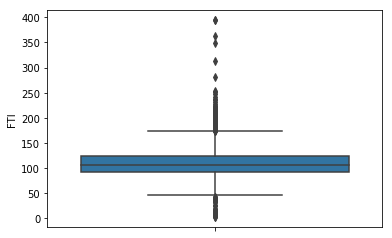

In [ ]:
sns.boxplot(y="FTI", data=data_final)

----

## Pridame stlpec ktory bude ukazovat ze kolko testov clovek podstupil

Vytvorime dataset ktory bude obsahovat iba stlpce ktore ukazuju ci hormon bol namerany alebo nie

In [ ]:
measured_df = data_final.filter(regex='measured')
measured_df.head()

,FTI measured,T3 measured,TSH measured,TT4 measured,T4U measured
0,0,1.0,1,1,0
1,1,1.0,1,1,1
2,0,0.0,0,0,0
3,1,1.0,1,1,1
4,1,1.0,1,1,1


In [ ]:
# Urobime sucet po stlpcov pre dany riadok
result = measured_df.sum(axis=1)

# Vytvorime novy atribut 'measured_hormones' kde priradime tento sucet
data_final['measured_hormones'] = result

----

## Ideme sa pozriet na distribuciu chybajucich hodnot pre dany dataset

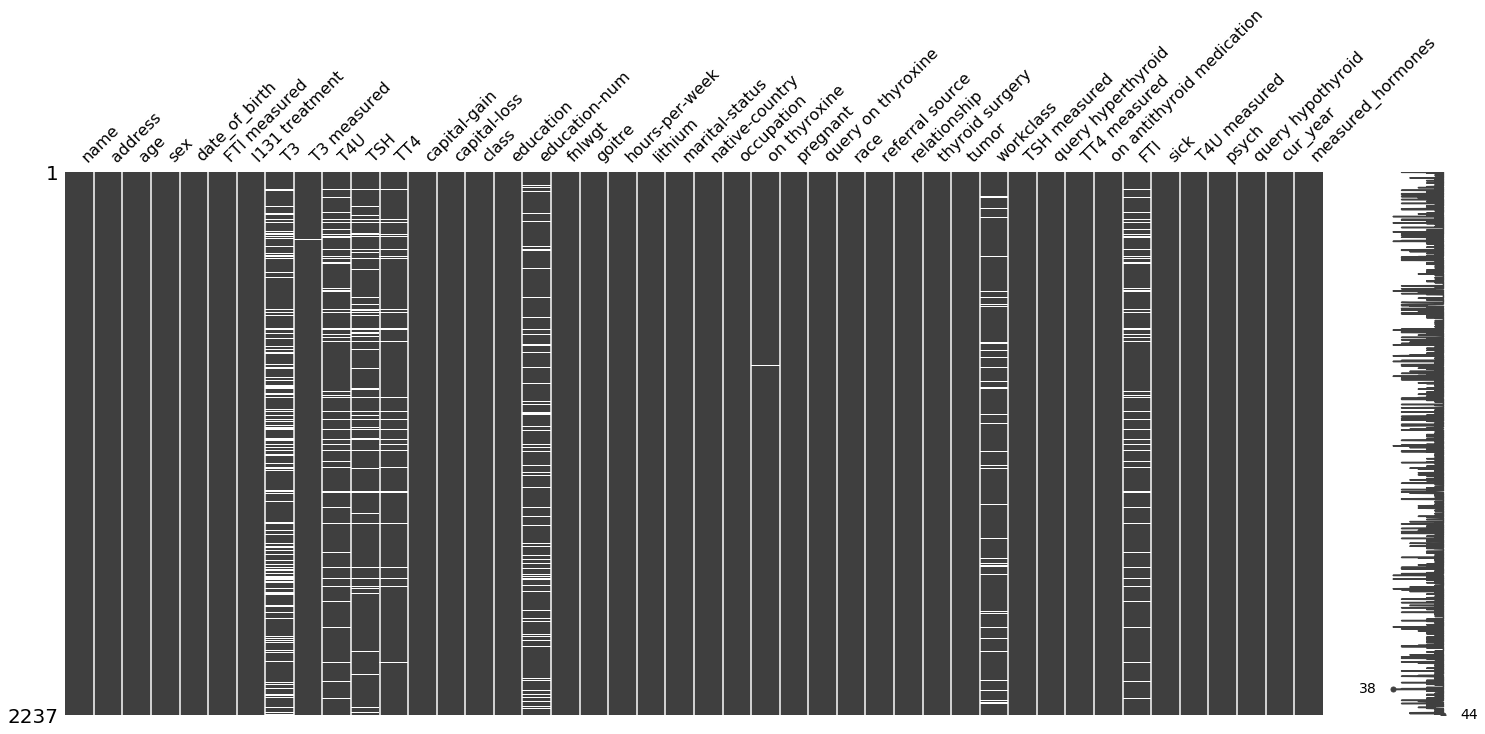

In [ ]:
import missingno as msno

msno.matrix(data_final)
plt.show()

Na tomto grafe vidime rozlozenie chybajucich hodnot v datasete. Vidime ze hodnoty chybaju iba v 8 stlpcoch. Taktiez z tohto grafu vidime ze pri jednom zazname chyba v 6 stlpcoch hodnota.

### Vytvorime mapu korelacii

In [ ]:
corr_df = data_final
corr_m = corr_df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

In [ ]:
mask = np.zeros_like(corr_m, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr_m, mask = mask, cmap = cmap, vmax = .3, center = 0, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

Tato mapa nam pomoze pri vyberu atributov k predikcii chybajucich hodnot.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import Imputer
from sklearn.preprocessing import minmax_scale
from sklearn import model_selection as ms
from sklearn import preprocessing

import scipy.stats as stats

from sklearn.pipeline import Pipeline, FeatureUnion

In [ ]:
class ModelTransformer(TransformerMixin):
    def __init__(self, model):
        self.model = model

    def fit(self, *args, **kwargs):
        self.model.fit(*args, **kwargs)
        print(self.model.score(*args, **kwargs))
        return self

    def transform(self, X, **transform_params):
        return pd.DataFrame(self.model.predict(X))

Tu v tejto klase su zadefinovane pomocne funkcie na doplnanie hodnot a predikciu.

In [ ]:
class Transformations:
    def __init__(self):
        self.pipeline = Pipeline([('classifier', FeatureUnion([('dtc', ModelTransformer(LinearRegression())),
                                                               ('knn', ModelTransformer(KNeighborsRegressor(5)))]))])
        
        
    # Metoda doplni cybajuce hodnoty pre stlpec ktoreho meno je dane cez parameter a metrika doplnovania chybajucich hodnot tiez
    def predict_numeric(self, data, strategy, column_name):
        mean_imputer = Imputer(missing_values='NaN', strategy=strategy, axis=0)
        mean_imputer = mean_imputer.fit(np.array(data[column_name]).reshape(-1, 1))
        
        imputed_height = mean_imputer.transform(np.array(data[column_name]).reshape(-1, 1))
        data[column_name] = imputed_height
        
        return data
    
    
    # Metoda pomocou ktorej zaenkodujeme kategoricke hodnoty na numericke, vracia pouzity encoder pre danu metodu.
    def label_encoder(self, data, column_name):
        encoder = preprocessing.LabelEncoder()

        data.loc[data[column_name].isnull() == False, column_name] = encoder.fit_transform(data[data[column_name].isnull() == False][column_name])

        return encoder
    
    
    # Metoda ktora dostava ako parameter encoder vrateny funkciou label_encoder a vrati povodne encodovane hodnoty.
    def label_decoder(self, data, encoder, column_name):
        return encoder.inverse_transform(data[column_name])
    
    
    # Metoda frati najcastejsiu hodnotu z pola poskytnutym parametrom 'a'
    def most_common(self, a):
        (values, counts) = np.unique(a, return_counts=True)
        ind = np.argmax(counts)
        return values[ind]
    
    
    # Metoda ktora nahradi outlinery zo stlpca datasetu ktoreho meno dostaneme cez parameter
    def identify_outliers(self, data, column_name):
        Q_down = data[column_name].quantile(0.25) - 1.5 * stats.iqr(data[column_name])
        Q_up = data[column_name].quantile(0.95) + 1.5 * stats.iqr(data[column_name])

        return data[(data[column_name] > Q_up) | (data[column_name] < Q_down)][column_name]
        
    def replace_outliers(self, data, column_name):
        Q_down = data[column_name].quantile(0.05)
        Q_up = data[column_name].quantile(0.95)

        data.loc[data[column_name] <= Q_down, column_name] = Q_down
        data.loc[data[column_name] >= Q_up, column_name] = Q_up
        
        
    # Funkcia ktora vrati novy dataset z encodovanymi hodnotamy (one hot encoder) pre dany stlpec.
    def one_hot_encode(self, data, column_name):
        output = pd.get_dummies(data[column_name], prefix=column_name)
        
        data = pd.concat([data, output], axis=1)
        return data
        
        
    # Funckia ktora vrati 2 datasety, jeden z datamy ktore pouzijeme na predikciu, a dalsi ktore obsahuje labely.
    def get_data_columns(self, data, for_column, columns_array):
        train_X = data[data[for_column].isnull() == False][columns_array]
        train_y = data[for_column].dropna().astype(int)

        return train_X, train_y
    
    
    # Metoda ktora vrati dataset z null hodnotami pre stlpec datasetu ktoreho meno dostane cez parameter
    def get_nan_data_columns(self, data, for_column, columns_array):
        return data[data[for_column].isnull()][columns_array]
    
    
    # Funkcia ktora vrati predikovane hodnoty
    def get_predicted_values(self, X, y, X_nan):
        self.pipeline.fit(X, y)
        predicted = self.pipeline.transform(X_nan)
        
        return predicted
    
    
    # Funkcia ktora vrati dataset, z doplnenimi chybajucimi hodnotami predikovanymi pre dany stlpec.
    def replace_predicted_values(self, data, encoder, predicted, for_column):
        data.loc[data[for_column].isnull(), for_column] = predicted[:, 1].reshape(-1, 1)
        
        if encoder != None:
            data[for_column] = self.label_decoder(data, encoder, for_column).reshape(-1, 1)
        
        return data
        
        
    # Metoda ktora skobinuje vsetky metody hore vyzsie, a vrati dataset.
    def predict_values(self, data, for_column, columns_array):
#         columns_array = [(column_name + '_' + str(x)) for column_name in columns_name for x in data[column_name].unique()]
        
#         if data_train[for_column].dtype != np.dtype(np.float64):
#             column_encoder = self.label_encoder(data, for_column)
#         else:
        column_encoder = None
        
        train_X, train_y = self.get_data_columns(data, for_column, columns_array)
        train_X_nan = self.get_nan_data_columns(data, for_column, columns_array)
        
        predicted = self.get_predicted_values(train_X, train_y, train_X_nan)
        
        return self.replace_predicted_values(data, column_encoder, predicted, for_column)
    
    
    # Metoda ktora vrati dataset iba zo stlpcami datasetu ktorych mena dame cez parameter.
    def get_columns_for_prediction(self, data, columns_array):
        
        columns = [(col_name + '_' + str(column_name)) for col_name in columns_array for column_name in data[col_name].unique()]
                                 
        return data.loc[:, columns]

In [ ]:
t = Transformations()

In [ ]:
data_final = t.predict_numeric(data_final, 'mean', 'TT4')

In [ ]:
data_final = t.predict_numeric(data_final, 'mean', 'TSH')

Pouzijeme linearnu regresiu a knn na doplnanie hodnot.

In [ ]:
data_final = t.predict_values(data_final, 'T3', ['TT4', 'TSH'])

Prvy riadok zodpoveda presnosti nafitovania dat linearnej regresii a druhy knn.

In [ ]:
data_final = t.predict_values(data_final, 'T4U', ['TT4', 'TSH'])

In [ ]:
data_final = t.predict_values(data_final, 'FTI', ['TT4', 'TSH', 'T4U'])

Pozrieme sa na to ze ktore data este chybaju.

In [ ]:
data_final.info()

Doplnime age najcastejsie sa vyskytujucou hodnotou.

In [ ]:
data_final.loc[data_final['age'].isnull(), 'age'] = t.most_common(data_final['age'].dropna())

-----

## Nasleduje odstranenie outlinerov.

In [ ]:
# Zadefinujeme si hormony pre ktore budeme plotovat rozlozenia.
hormones = ['T3', 'age', 'T4U', 'TSH', 'TT4', 'FTI']

data_final[hormones].hist(figsize=(18, 12))
plt.show()

Odtial vydime rozlozenie jednotlivych hodnot. 'TSH' a ani 'age' nevyzeraju na na normalne rozdelenie.  

Zobrazime si boxploty jednotlivych hodnot, na ktorych si mozeme prezriet outliery.

In [ ]:
from scipy.stats import boxcox

def analyseHormones(dataset, hormones_columns):
    mpl_fig = plt.figure(figsize=(18, 12))
    for hormone, i in zip(hormones_columns, range(0, len(hormones))):
        ax1 = mpl_fig.add_subplot(100 + (len(hormones) * 10) + 1 + i)
        ax1.boxplot(dataset[hormone])
        ax1.set_title(hormone)
        
    plt.show()

In [ ]:
analyseHormones(data_final, hormones)

Urobime si pre hodnoty Shapirov test, ci data patria do normaloveho rozdelenia. Ak nepatria tak ich hodnoty pretransformujeme pomocou boxcoxu.

In [ ]:
for hormone in hormones:
    print(hormone)
    _, p = stats.shapiro(data_final[hormone])
    print(p)

    if float(p) < 0.05:
        print('data nie su z normaloveho rozdelenia')
        transformed, att = boxcox(data_final[data_final[hormone] > 0][hormone])
        
        data_final.loc[data_final[hormone] > 0, hormone] = transformed
        
    print('----')

Podla testu ziaden atribut nepatri do normaloveho rozdelenia.

Po transformacii si opat vizualizujeme data.

In [ ]:
hormones = ['T3', 'age', 'T4U', 'TSH', 'TT4', 'FTI']
data_final[hormones].hist(figsize=(18, 12))
plt.show()

In [ ]:
analyseHormones(data_final, hormones)

In [ ]:
def printDistribution(hormones_columns):
    fig, ax = plt.subplots(6, 3, figsize=(18,12))
    fig.tight_layout()
    fig.subplots_adjust(top=0.95)
    for hormone, i in zip(hormones_columns, range(0, len(hormones))):
        
        # Vyprintujeme inicialne rozdelenie
        sns.distplot(data_final[hormone], ax=ax[i][0])
        #ax[i][0].title.set_text(hormone + " - Normal")
        
        
        # Vyprintujeme rozdelenie bez outlierov
        out_indexes = t.identify_outliers(data_final, hormone)
        temp_df = data_final.drop(out_indexes.index)
        
        sns.distplot(temp_df[hormone], ax=ax[i][1])
        #ax[i][1].title.set_text(hormone + " - Dropped Indexes")
        
        
        # Vyprintujeme rozdelenie z nahradenim outlierov kvantilom
        temp_df = data_final.copy()
        t.replace_outliers(temp_df, hormone)
    
        sns.distplot(temp_df[hormone], ax=ax[i][2])
        #ax[i][2].title.set_text(hormone + " - 5/95 quantile")
        
    fig.show()

#### Ideme odstranovat outliers
Porovname si povodny stav, so stavom, ked outliery ich ostranime(stredne grafy) a ked ich nahradime 95 percentnym kvartilom(grafy vpravo)

In [ ]:
printDistribution(hormones)

-----

## Vytvorenie pipeliny
Teraz aplikujeme hore ziskane poznatky a vytvorime si modeli do pipeline.

In [ ]:
class BinaryEncoder(TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
        
    def fit(self, *args, **kwargs):
        return self 
    
    def mapToBool(self, value):
        if not isinstance(value, str):
            return float('nan')
        
        return (int(1) if value[0].lower() == 't' else int(0))
    
    def transform(self, df, **transform_params):
        for column in self.columns:
            df[column] = df[column].map(lambda value: self.mapToBool(value))
            
        return df

In [ ]:
class ColumnDropper(TransformerMixin):
    def __init__(self, column_names):
        self.column_names = column_names
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        return df.drop(self.column_names, axis=1)

In [ ]:
class ClassFixer(TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        df['class'] = df['class'].map(lambda x: str(x).split('.')[0])
        return df

In [ ]:
import ast
class DecodeJSONColumn(TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        new_columns = df.pop(self.column_name).apply(lambda x: pd.Series(ast.literal_eval(x)))
        
        return df.join(new_columns)

In [ ]:
class CombineDatasets(TransformerMixin):
    def __init__(self, data_personal, data_other):
        self.data_personal = data_personal
        self.data_other = data_other
        
    def handle_duplicate_rows(self, rows):
        numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

        # Zoberieme si iba polozky numerickeho typu, nad ktorymi aplikujeme agregovanu funkciu: mean
        numeric_rows = rows.select_dtypes(include=numerics).agg(np.mean)

        # To iste urobime pre polozky ineho datoveho typu ako numericke, na ktore aplikujeme agregovanu funkciu najcastejsie
        # vyskytujucu hodnotu
        cat_rows = rows.select_dtypes(include=['object']).agg(self.most_common)

        # Skobinujeme tieto dva datasety
        combined = pd.concat([numeric_rows, cat_rows], axis=0, sort=True)
        #print(pd.DataFrame(combined))
        return combined

    # Funkcia ktora vrati najcastejsiu hodnotu
    def most_common(self, rows):
        counts = rows.value_counts()
        if len(counts) > 0:
            return counts.index[0]

        return float('nan')
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        grouped = self.data_other[self.data_other.duplicated(subset=['name', 'address'], keep=False)].groupby(['name', 'address'])
        
        result = grouped.apply(self.handle_duplicate_rows).reset_index(drop=True)
        dropped_duplicates = data_other.drop_duplicates(subset=['name', 'address'], keep=False)
        self.data_other = pd.concat([dropped_duplicates, result], sort=True)
        
        df = pd.merge(self.data_personal, self.data_other, how='inner', left_on=['name', 'address'], right_on=['name', 'address'])
        
        return df

In [ ]:
class CountMeasuredHormones(TransformerMixin):
    def __init__(self, column_name):
        self.column_name = column_name
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        measured_df = df.filter(regex='measured')
        
        # Urobime sucet po stlpcov pre dany riadok
        result = measured_df.sum(axis=1)

        # Vytvorime novy atribut 'measured_hormones' kde priradime tento sucet
        df[self.column_name] = result
        
        return df

In [ ]:
class FillMeasuredColumns(TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, *args, **kwargs):
        return self
    
    def isMeasured(self, row, hormone):
        #print(row[hormone])
        if np.isnan(row[hormone]):
            return 0
        return 1
    
    def transform(self, df, **transform_params):
        measured_df = df.filter(regex='measured')
        for column in measured_df.columns:
            hormone_name = column.split(" ")[0]
            #print(hormone_name)
            df[column] = df.apply(lambda row: self.isMeasured(row, hormone_name), axis=1)
        
        return df

In [ ]:
import dateutil.parser as parser

class FixDates(TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, *args, **kwargs):
        return self
    
    def formatDate(self, dateString):
        if not isinstance(dateString, str):
            return float('nan')
        
        # zoberiem si len datum, cas orezem
        dateString = dateString[:min(len(dateString), 10)]
        dateObj = parser.parse(dateString, yearfirst = True)
        
        return dateObj.strftime('%Y-%m-%d')
    
    def transform(self, df, **transform_params):
        df['date_of_birth'] = df['date_of_birth'].map(lambda dateString: self.formatDate(dateString))
        
        return df

In [ ]:
from datetime import datetime

class ComputeCurYear(TransformerMixin):
    def __init__(self):
        pass
        
    def fit(self, *args, **kwargs):
        return self
    
    def getCurYear(self, row):
        if not isinstance(row['date_of_birth'], str):
            return float('nan')
        
        datetime_object = datetime.strptime(row['date_of_birth'], '%Y-%m-%d')
        return datetime_object.year + int(row['age'])
    
    def transform(self, df, **transform_params):
        df['cur_year'] = df.apply(lambda row: self.getCurYear(row), axis=1)
        
        return df

In [ ]:
from sklearn.impute import SimpleImputer

class FillNanNumeric(TransformerMixin):
    def __init__(self, strategy, column_name):
        self.strategy = strategy
        self.column_name = column_name
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        imputer = SimpleImputer(missing_values=np.nan, strategy=self.strategy)
        imputer = imputer.fit(np.array(df[self.column_name]).reshape(-1, 1))
        
        output = imputer.transform(np.array(df[self.column_name]).reshape(-1, 1))
        df[self.column_name] = output
        
        return df

In [ ]:
class PredictNanNumeric(TransformerMixin):
    def __init__(self, predicting_column, columns):
        self.predicting_column = predicting_column
        self.columns = columns
        
    def get_data_columns(self, data):
        train_X = data[data[self.predicting_column].isnull() == False][self.columns]
        train_y = data[self.predicting_column].dropna().astype(int)

        return train_X, train_y    
    
    def get_nan_data_columns(self, data):
        return data[data[self.predicting_column].isnull()][self.columns]
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        train_X, train_y = self.get_data_columns(df)
        train_X_nan = self.get_nan_data_columns(df)
        
        lr = LinearRegression()
        lr_model = lr.fit(train_X, train_y)
        lr_score = lr_model.score(train_X, train_y)
        

        knnr = KNeighborsRegressor(5)
        knnr_model = knnr.fit(train_X, train_y)
        knnr_score = knnr_model.score(train_X, train_y)
        
        if lr_score > knnr_score:
            predicted = lr_model.predict(train_X_nan)
        else:
            predicted = knnr_model.predict(train_X_nan)
            
        df.loc[df[self.predicting_column].isnull(), self.predicting_column] = predicted
        
        return df

In [ ]:
class Replacer(TransformerMixin):
    def __init__(self, columns, replaceWhat, replaceWith, typeFormatter):
        self.columns = columns
        self.replaceWhat = replaceWhat
        self.replaceWith = replaceWith
        self.typeFormatter = typeFormatter
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        for column in self.columns:
            df[column] = df[column].map(lambda x: self.replaceWith if x == self.replaceWhat else self.typeFormatter(x))
        
        return df

In [ ]:
from scipy.stats import boxcox

class QuantileReplacer(TransformerMixin):
    def __init__(self, column):
        self.column = column
        
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        _, p = stats.shapiro(df[self.column])
        if float(p) < 0.05:
            transformed, att = boxcox(df[df[self.column] > 0][self.column])
            df.loc[df[self.column] > 0, self.column] = transformed
        
        Q_down = df[self.column].quantile(0.05)
        Q_up = df[self.column].quantile(0.95)

        df.loc[df[self.column] <= Q_down, self.column] = Q_down
        df.loc[df[self.column] >= Q_up, self.column] = Q_up
        
        return df

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

class Classifier(TransformerMixin):
    def __init__(self, predicting_column, columns):
        self.predicting_column = predicting_column
        self.columns = columns
    
    def get_data_columns(self, data):
        train_X = data[data[self.predicting_column].isnull() == False][self.columns]
        train_y = data[self.predicting_column].dropna().astype(int)

        return train_X, train_y    
    
    def get_nan_data_columns(self, data):
        return data[data[self.predicting_column].isnull()][self.columns]
    
    def label_encoder(self, data, column_name):
        encoder = preprocessing.LabelEncoder()

        data.loc[data[self.predicting_column].isnull() == False, self.predicting_column] = encoder.fit_transform(data[data[self.predicting_column].isnull() == False][self.predicting_column])

        return encoder
    
    def label_decoder(self, data, encoder, column_name):
        return encoder.inverse_transform(data[column_name])
    
    def fit(self, *args, **kwargs):
        return self
    
    def transform(self, df, **transform_params):
        
        if df[self.predicting_column].dtype != np.dtype(np.float64):
            column_encoder = self.label_encoder(df, self.predicting_column)
        
        
        train_X, train_y = self.get_data_columns(df)
        train_X_nan = self.get_nan_data_columns(df)
        
        if len(train_X_nan) > 0:

            kNN = KNeighborsClassifier(n_neighbors=5)
            kNN.fit(train_X, train_y)

            predicted = kNN.predict(train_X_nan)

            df.loc[df[self.predicting_column].isnull(), self.predicting_column] = predicted


            if df[self.predicting_column].dtype != np.dtype(np.float64):
                df[self.predicting_column] = self.label_decoder(df, encoder, self.predicting_column).reshape(-1, 1)
        
        return df

In [ ]:
from sklearn.pipeline import Pipeline

Po zadefinovani transformatorov, si znovu nacitame data na novo zo suboru.

In [ ]:
data_personal = pd.read_csv("data/personal_train.csv")
data_other = pd.read_csv("data/other_train.csv")

Zadefinujeme pipelinu. Poradie transformaciach ktore bude robit, je poradie ktore sme robili hore.

In [ ]:
ppl = Pipeline([
    ('combination', CombineDatasets(data_personal, data_other)),
    ('json_decode', DecodeJSONColumn('medical_info')),
    ('drop_columns', ColumnDropper(['hypopituitary', 'TBG measured', 'TBG'])),
    ('binary_fixer', BinaryEncoder(bool_columns)),
    ('class_fix', ClassFixer()),
    ('fix_dates', FixDates()),
    ('compute_cur_year', ComputeCurYear()),
    ('fti_question_mark_to_nan', Replacer(['FTI'], '?', float('nan'), float)),
    ('fti_question_mark_to_nan1', Replacer(['FTI'], np.nan, float('nan'), float)),
    ('fill_measured_columns', FillMeasuredColumns()),
    ('count_measured', CountMeasuredHormones('measured_hormones')),
    
    # Fill hormony
    ('fill_tt4', FillNanNumeric('mean', 'TT4')),
    ('fill_tsh', FillNanNumeric('median', 'TSH')),
    ('predicted_t3', PredictNanNumeric('T3', ['TT4', 'TSH'])),
    ('predicted_t4u', PredictNanNumeric('T4U', ['TT4', 'TSH'])),
    ('predicted_fti', PredictNanNumeric('FTI', ['TT4', 'TSH', 'T4U'])),
    
    # Fill pregnant
    ('pregnant_predict', Classifier('pregnant', ['T3', 'T4U', 'TT4'])),
    
    # Fill other variables
    ('fill_tumor', FillNanNumeric('median', 'tumor')),
    ('fill_lithium', FillNanNumeric('mean', 'lithium')),
    ('fill_on_thyroxine', FillNanNumeric('mean', 'on thyroxine')),
    ('fill_goitre', FillNanNumeric('most_frequent', 'goitre')),
    ('fill_q_on_thyroxine', FillNanNumeric('mean', 'query on thyroxine')),
    
    #Replace outlier
    ('replace_t3', QuantileReplacer('T3')),
    ('replace_age', QuantileReplacer('age')),
    ('replace_t4u', QuantileReplacer('T4U')),
    ('replace_tsh', QuantileReplacer('TSH')),
    ('replace_tt4', QuantileReplacer('TT4')),
    ('replace_fti', QuantileReplacer('FTI')),
    
])

Spustime funkciu ktora zbehne vsetky transformacie v pipeline.

In [ ]:
data_final = ppl.transform(None)

Rychly test ci data sa podobaju tym ake boli pri manualnom spracovani.

In [ ]:
len(data_final)

In [ ]:
data_final.head()

Preverime ci chybajuce hodnoty boli doplnene.

In [ ]:
msno.matrix(data_final)
plt.show()

Pre stlpce ktore povazujeme ze nam v predikcie vobec nepomozu ako napriklad (education, education-num, workclass, a pod.) sme sa rozhodli nedoplnat hodnoty zbytocne.

-----

## Analyza po transformacii

In [ ]:
hormones = ['T3', 'age', 'T4U', 'TSH', 'TT4', 'FTI']
data_final[hormones].hist(figsize=(18, 12))
plt.show()

In [ ]:
analyseHormones(data_final, hormones)

In [ ]:
sns.pairplot(data_final[data_final['class'] != 'nan'], hue='class', vars=['TT4', 'T4U', 'TSH', 'T3'])